## Notebook for image transformation prior to ML algorithm fitting

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import cv2
import imageio

from skimage.transform import radon, rescale


os.chdir('../')
from src import transforms

print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction


In [ ]:
path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/'

(328, 500) (328, 500)


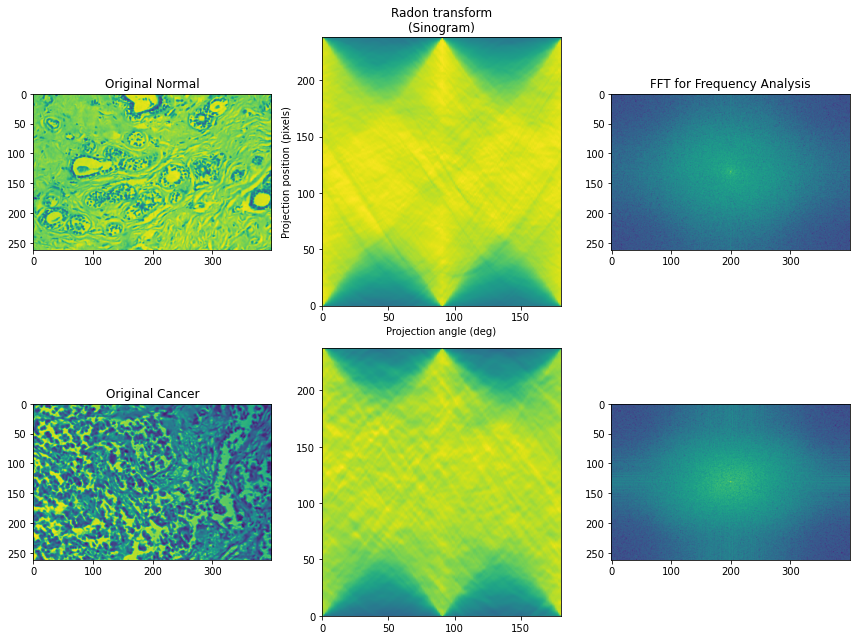

In [51]:
# import image as numpy array. Use Imageio
normal = 'SOB_B_TA-14-3411F-100-017.png'#'D_4530_1.RIGHT_CC.jpg'#
malignant = 'SOB_M_DC-14-2773-100-020.png'#'Mass-Training_P_01057_RIGHT_CC.jpg'
img1 = 'testimage4.jpg'

image1 = imageio.imread(normal).sum(axis=2) # for 3 channel images
image2 = imageio.imread(malignant).sum(axis=2)# for 3 channel images
print(image1.shape, image2.shape)

# Rescale
image1 = rescale(image1, scale=0.8, mode='reflect', multichannel=False)
image2 = rescale(image2, scale=0.8, mode='reflect', multichannel=False)

# Sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sino1 = radon(image1, theta=theta, circle=True)
sino2 = radon(image2, theta=theta, circle=True)

# FFT with shift to get zero frequency at center
f = np.fft.fft2(image1)
f_shift = np.fft.fftshift(f)
fft1 = 20*np.log(np.abs(f_shift))

f = np.fft.fft2(image2)
f_shift = np.fft.fftshift(f)
fft2 = 20*np.log(np.abs(f_shift))


# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 9))

ax1 = axes[0,0]
ax1.set_title("Original Normal")
ax1.imshow(image1)#, cmap=plt.cm.Greys_r)

ax2 = axes[0,1]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sino1,# cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')


ax = axes[0,2]
ax.set_title("FFT for Frequency Analysis")
ax.imshow(fft1)#, cmap=plt.cm.Greys_r)


ax = axes[1,0]
ax.set_title("Original Cancer")
ax.imshow(image2)#, cmap=plt.cm.Greys_r)

ax = axes[1,1]
ax.imshow(sino2,# cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

ax = axes[1,2]
ax.imshow(fft2)#, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.savefig('radon_fft_hist_2.png', dpi=350)
plt.show()


In [11]:
type(image)

numpy.ndarray

## FFT of Histology images

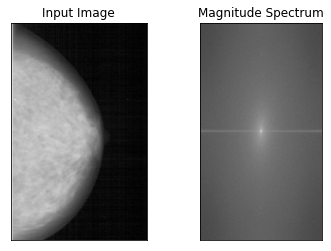

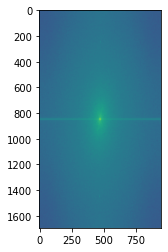

In [38]:
# import image as numpy array. Use Imageio
normal = 'D_4530_1.RIGHT_CC.jpg'
malignant = 'Mass-Training_P_01057_RIGHT_CC.jpg'
img1 = 'testimage4.jpg'

image1 = imageio.imread(normal)
image2 = imageio.imread(malignant)

image1 = rescale(image1, scale=0.8, mode='reflect', multichannel=False)
image2 = rescale(image2, scale=0.8, mode='reflect', multichannel=False)


# Do fft

# Get 2d fft of image -> this is complex array



fig, axes = plt.subplots(2,2, figsize=(8,9))
ax = axes[0,0]
ax.imshow(image1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()          

